# Business Problem
As a digital marketing firm, one of our core goals is to help clients achieve the highest possible return on investment (ROI) from their advertising spend. In 2019, we launched two distinct ad campaigns—one using Facebook Ads, the other using Google AdWords. Now, it's crucial to evaluate which platform has driven better performance based on user engagement (clicks), conversion success, and cost-efficiency. Understanding this will allow us to fine-tune future campaign planning, budget allocation, and platform selection to deliver measurable improvements for our clients.

# Research Question
#### Which advertising platform—Facebook or AdWords—delivers greater value in terms of conversion rates, click engagement, and spending efficiency?

# Importing Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## 📊 Dataset Overview

This dataset tracks the performance of two online ad campaigns—one on **Facebook** and the other on **Google AdWords**—throughout the entire year of **2019**. Each row in the dataset represents a **single day**, giving us a total of **365 days of campaign data** to explore and compare.

The data includes important marketing metrics that help us understand how well each campaign performed over time. These features include:

* **Date**: Shows the exact day the data was recorded (from January 1st to December 31st, 2019).
* **Ad Views**: The number of times the ad appeared on users' screens.
* **Ad Clicks**: How many times users clicked on the ad.
* **Ad Conversions**: The number of successful actions (like signups or purchases) taken after someone clicked the ad.
* **Cost per Ad**: The amount spent each day on the Facebook ad.
* **Click-Through Rate (CTR)**: Shows what percentage of views turned into clicks—useful to measure how appealing the ad is.
* **Conversion Rate**: Tells us what percentage of clicks led to conversions—an indicator of ad quality and audience targeting.
* **Cost per Click (CPC)**: The average cost spent to get one click on the ad.


In [38]:
# loading the dataset
df = pd.read_csv('C:/Users/Azmary/Desktop/A-B-Testing-Marketing-Campaigns/new/ABmarketing_campaign.csv')
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [39]:
df.shape

(365, 17)

In [40]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [41]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
# descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


# Comparing Campaigns performance

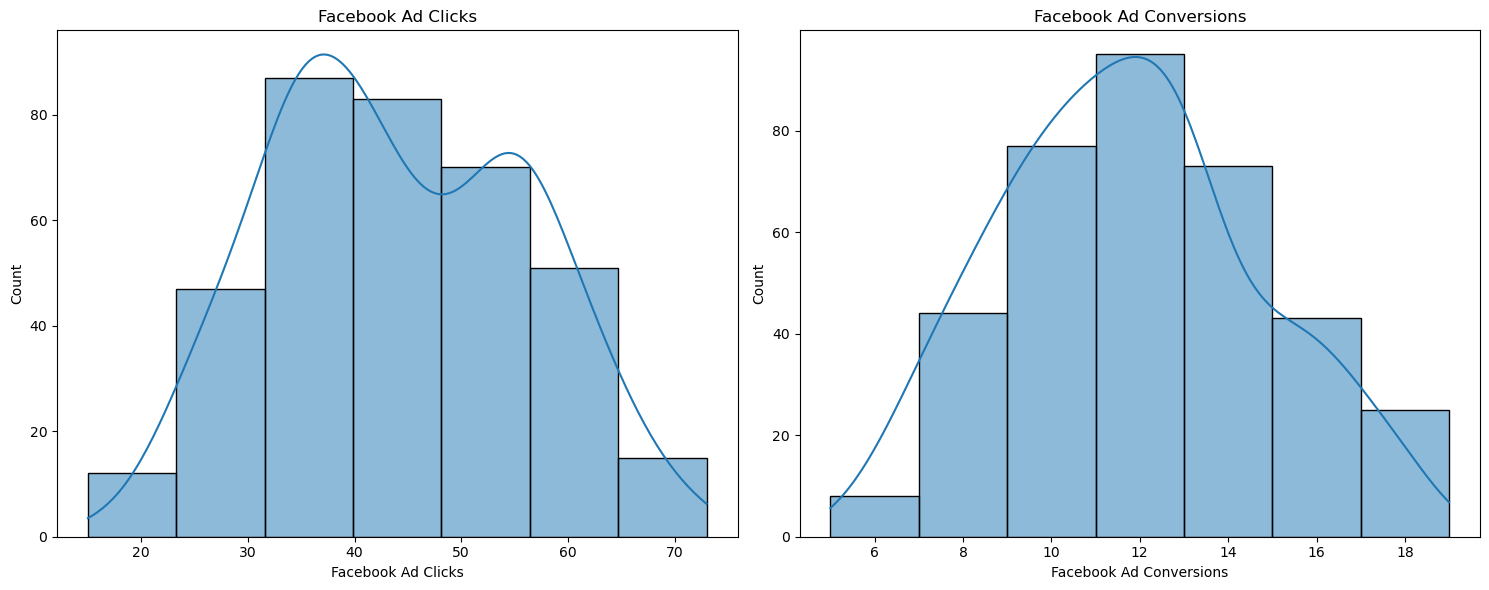

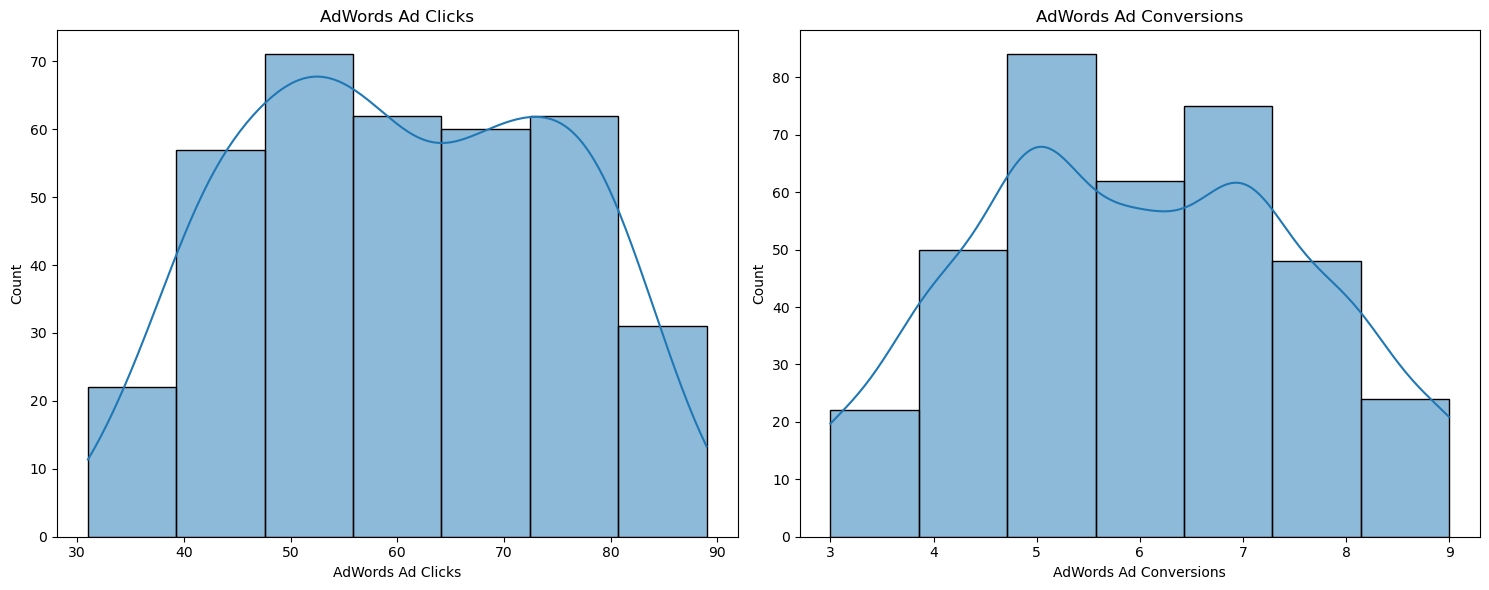

In [43]:
# Define the plot parameters in a list of tuples
plot_data = [
    ('Facebook Ad Clicks', 'Facebook Ad Conversions'),
    ('AdWords Ad Clicks', 'AdWords Ad Conversions')
]

# Plot distributions using a loop
for platform_clicks, platform_conversions in plot_data:
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(platform_clicks)
    sns.histplot(df[platform_clicks], bins=7, edgecolor='k', kde=True)
    
    plt.subplot(1, 2, 2)
    plt.title(platform_conversions)
    sns.histplot(df[platform_conversions], bins=7, edgecolor='k', kde=True)
    
    plt.tight_layout()
    plt.show()

Facebook Ads:
The distribution of Facebook ad clicks appears somewhat close to a normal distribution, although it might be slightly skewed to the right (positive skew). This suggests that while most click counts fall in the 30-60 range, there are a few instances with higher click numbers. The Facebook ad conversions also show a roughly symmetrical shape, perhaps a bit more clearly bell-shaped than the clicks. The peak seems to be around 12 conversions, indicating this is the most frequent conversion range.


AdWords Ads:
The AdWords ad clicks seem to have a less pronounced central peak compared to Facebook clicks. The distribution appears a bit flatter, suggesting a more even spread of click counts across the 40-80 range. There might be a slight dip in the 60-70 range. The AdWords ad conversions show a distribution with a few potential peaks (around 4-5 and 7). This could indicate different segments of ads or user behaviors leading to varying conversion rates. The spread of conversions is narrower than the clicks.

#### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [44]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [45]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [46]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [47]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [48]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [49]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [50]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [51]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,more than 15,47,0.0


In [52]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

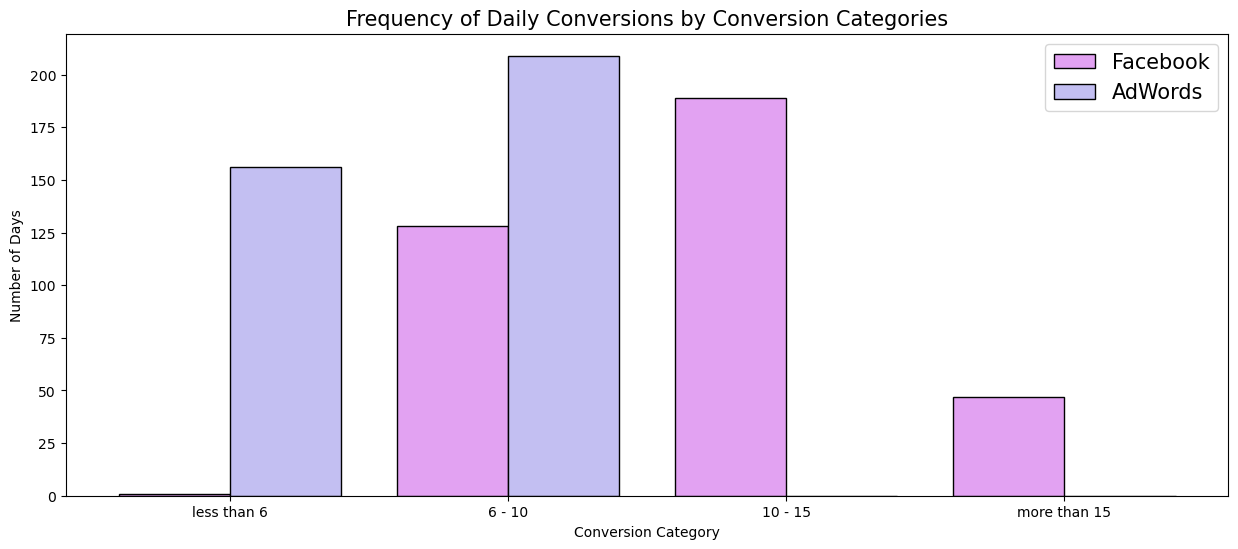

In [53]:
# Bar chart to compare conversion categories
plt.figure(figsize=(15, 6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label='Facebook', color='#e2a2f2', linewidth=1, edgecolor='k')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label='AdWords', color='#c3bff2', linewidth=1, edgecolor='k')
plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=15)
plt.legend(fontsize=15)
plt.show()

**Facebook**: The data indicates a more consistent performance with a notable number of days falling into the higher conversion categories (10-15 and more than 15). This suggests that Facebook campaigns might have been more effective at driving a larger number of conversions on a regular basis. The relatively even distribution across the higher conversion categories (10-15 and more than 15) could imply a stable and successful strategy for achieving significant daily conversions.

**AdWords**: The concentration of days in the "less than 6" and "6 - 10" conversion categories suggests that AdWords campaigns might have struggled to consistently achieve higher conversion volumes during the observed period. The complete absence of days in the higher conversion categories (10-15 and more than 15) is a critical point. Were there changes in bidding strategies, targeting, or ad creatives that negatively impacted higher conversion days? Could budget constraints have limited the ability to reach audiences that convert at a higher rate? Were there any external events or seasonal trends that disproportionately affected AdWords conversions?

#### Do more clicks on the ad really lead to more sales?

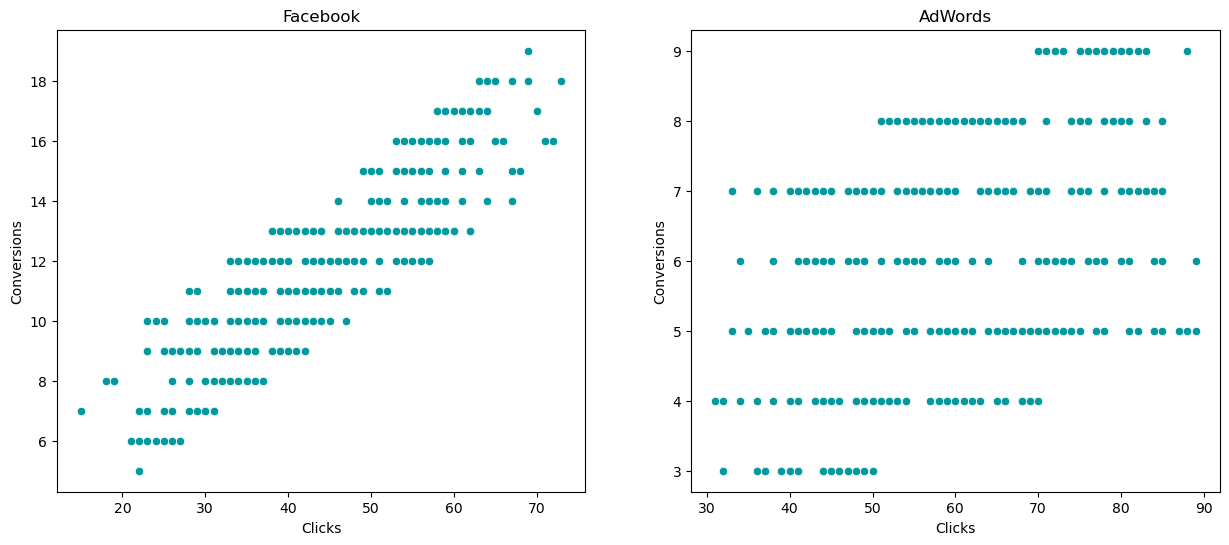

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [55]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [56]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [57]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.87
AdWords :  0.45


- A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
- This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
- The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
- A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.
- The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [58]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


The mean number of conversions from Facebook ads is 11.74, significantly higher than 5.98 from AdWords ads, indicating that Facebook generally drives more conversions.

The t-statistic (32.88) reflects a substantial difference between the two groups’ means relative to the variability in the data.

The p-value (9.35e-134) is extremely small—far below the 0.05 significance threshold—providing strong statistical evidence to reject the null hypothesis.

Since this is a one-tailed test (testing if Facebook > AdWords), the results strongly support the alternate hypothesis: Facebook ads yield significantly more conversions than AdWords.

The practical difference (11.74 vs. 5.98) is not only statistically significant but also business-relevant, suggesting a meaningful performance gap.

Recommendation: Based on this analysis, consider reallocating a larger portion of the advertising budget to Facebook. Test additional strategies like different creatives, audience segments, or ad formats on Facebook to further optimize conversions.

Finally, consider conducting follow-up tests over time or across different campaign types to validate whether this pattern holds consistently across marketing contexts or specific target demographics.

# Regression Analysis

#### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [59]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


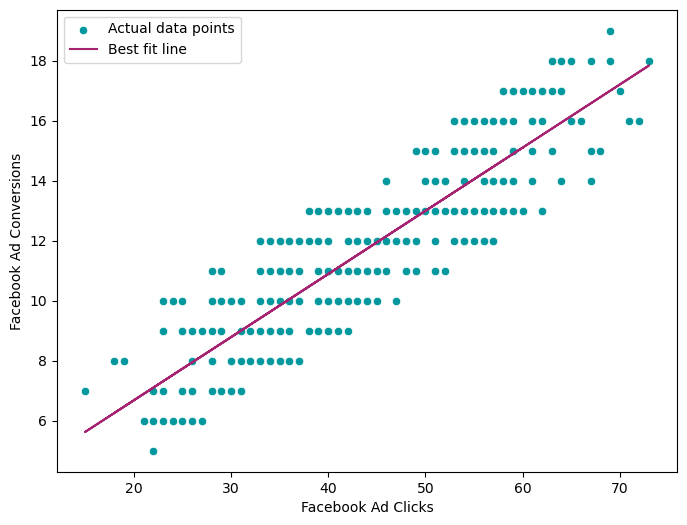

In [60]:
# Plotting linear regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E', label='Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color='#A62372', label='Best fit line')
plt.legend()
plt.show()

In [61]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


The Linear Regression model demonstrates strong predictive capability, with an R² score of 76.35%, indicating that a substantial portion of the variability in Facebook ad conversions can be explained by the number of ad clicks.

The low Mean Squared Error (2.02) further confirms the model's accuracy in estimating conversions.

For example, the model predicts that 50 clicks will result in approximately 13 conversions, while 80 clicks are expected to yield around 19.31 conversions, providing useful estimates for campaign planning.

These insights enable businesses to make data-driven decisions regarding budget allocation, performance forecasting, and advertising strategy optimization.

Ultimately, this model supports setting realistic campaign goals, improving ROI tracking, and enhancing overall marketing effectiveness through more accurate prediction of conversion outcomes.

# Analyzing Facebook Campaign metrics over time.

In [62]:
# A simple function to remove % or $ signs and convert to float
def convert_to_float(value):
    if isinstance(value, str):
        # Remove % or $ sign if present, then convert to float
        return float(value.replace('%', '').replace('$', ''))
    return value  # If it's already a number, return it as-is

# Apply this function to the relevant columns in your DataFrame
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(convert_to_float)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(convert_to_float)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(convert_to_float)
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(convert_to_float)


In [63]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


#### At what times of the month or days of the week do we observe the conversions?

In [64]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

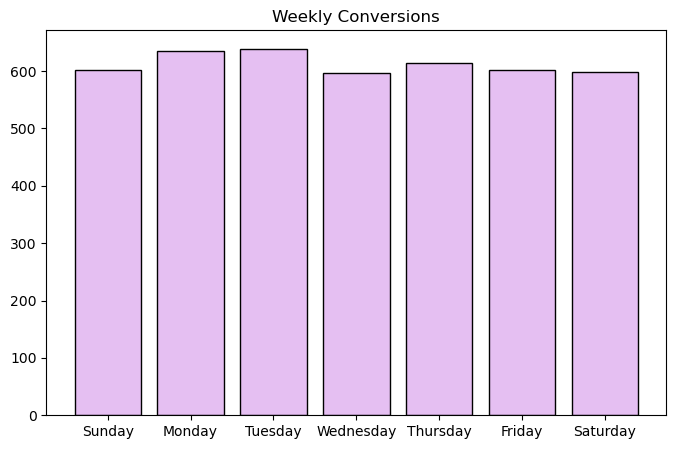

In [65]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#e5bff2', edgecolor = 'k')
plt.show()

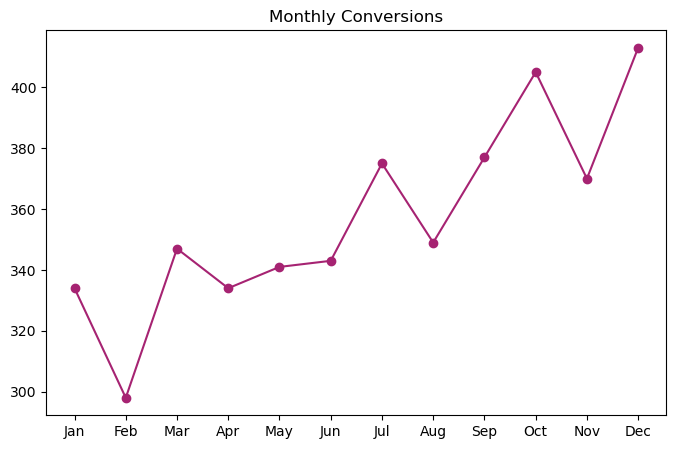

In [66]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

Weekly Trend: Conversions remain relatively stable across all weekdays, indicating consistent user engagement. Notably, Mondays and Tuesdays show the highest conversion activity, suggesting users are more responsive at the beginning of the workweek—possibly due to renewed focus or interest after the weekend.

Monthly Trend: The overall monthly conversion trend shows a gradual upward growth, reflecting increased campaign effectiveness or audience reach over time. However, dips in February, April, May, June, August, and November may indicate seasonal changes, shifts in consumer behavior, or strategic alterations in ad campaigns. These fluctuations highlight the importance of continuous monitoring and adaptation of marketing efforts throughout the year.

#### How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

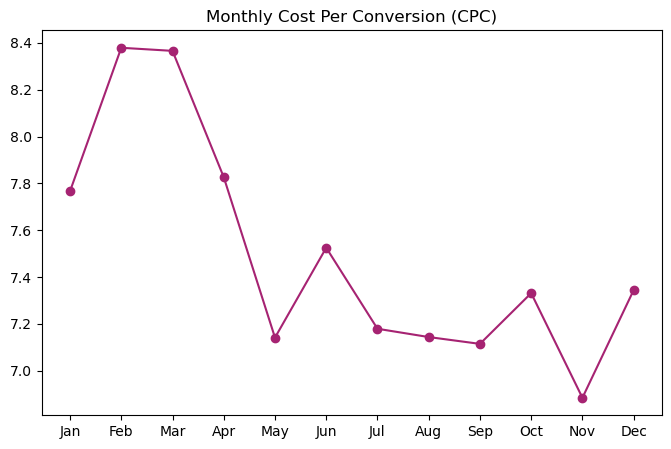

In [67]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

The Cost Per Click (CPC) trend across the 12-month period remains generally stable, with occasional fluctuations.

May and November stand out with the lowest CPC values, indicating more cost-efficient advertising—potentially due to better audience engagement or favorable market conditions.

In contrast, February shows the highest CPC, suggesting increased competition or reduced ad performance during that month.

These insights highlight strategic opportunities: allocating more budget to months with lower CPCs (like May and November) could enhance return on investment (ROI) by maximizing conversions at a lower cost.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [68]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.75542838510323
P-value: 2.1337375979060244e-26

p-value is less than significance value, Reject the null hypothesis


The extremely low p-value indicates strong evidence against the null hypothesis, confirming a statistically significant long-term relationship between advertising spend and conversions.

This suggests that as ad spending changes, conversions tend to move in tandem over time—demonstrating cointegration and implying a stable, predictable connection between the two.

Businesses can leverage this insight to strategically allocate budgets, focusing on campaigns with proven ROI. By aligning ad spend with expected conversion outcomes, organizations can optimize performance and reduce unnecessary costs over the long term.